In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [12]:
train = pd.read_csv('train_ltfs_finhack.csv')
test = pd.read_csv('test_ltfs_finhack.csv')

In [13]:
train_og = train.copy()
test_og = test.copy()

In [14]:
train.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [15]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
# Missing values statistics
missing_values = missing_values_table(train)
missing_values.head(20)

Your selected dataframe has 41 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Employment.Type,7661,3.3


In [19]:
train['source'] = 'train'
test['source'] = 'test'

In [20]:
alldata = pd.concat([train, test], axis=0)

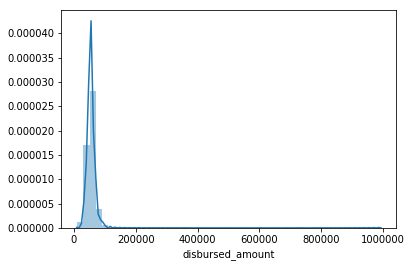

In [25]:
sns.distplot(alldata.disbursed_amount)

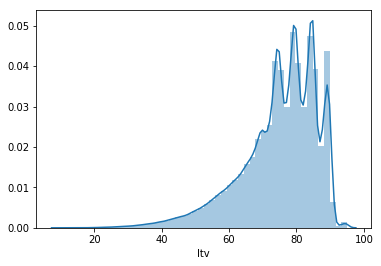

In [26]:
sns.distplot(alldata.ltv)

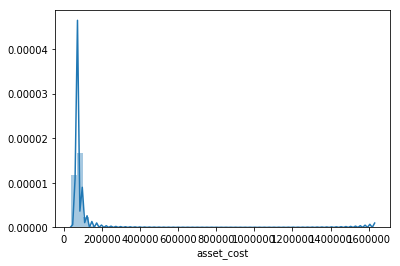

In [27]:
sns.distplot(alldata.asset_cost)

In [30]:
alldata['Employment.Type'].fillna(alldata['Employment.Type'].mode()[0],inplace=True)
alldata['Employment.Type'].value_counts()

Self employed    198533
Salaried         147013
Name: Employment.Type, dtype: int64

In [31]:
alldata['Age'] = alldata['Date.of.Birth'].apply(lambda x: 118 - int(x[-2:]))
alldata['Age'].head()

0    34
1    33
2    33
3    25
4    41
Name: Age, dtype: int64

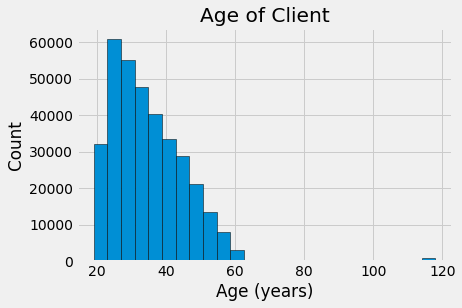

In [32]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(alldata['Age'] , edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

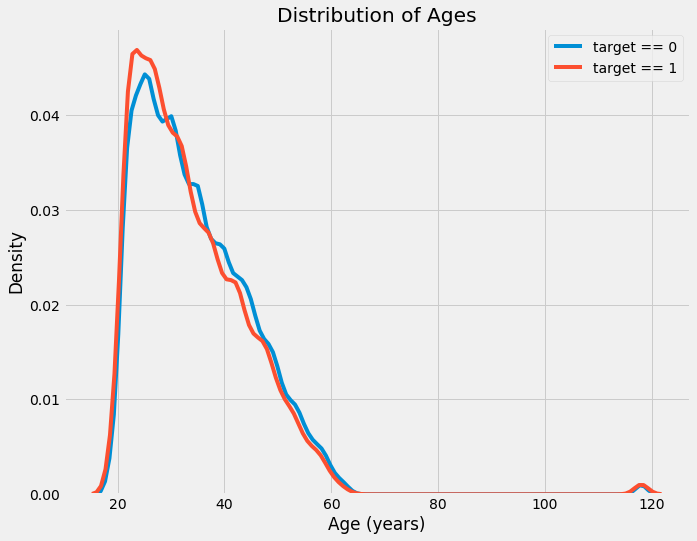

In [43]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(alldata.loc[alldata['loan_default'] == 0, 'Age'] , label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(alldata.loc[alldata['loan_default'] == 1, 'Age'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [44]:
# Age information into a separate dataframe
age_data = alldata[['loan_default', 'Age']]
age_data['Age'] = age_data['Age']

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['Age'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,loan_default,Age,YEARS_BINNED
0,0.0,34,"(30.0, 35.0]"
1,1.0,33,"(30.0, 35.0]"
2,0.0,33,"(30.0, 35.0]"
3,1.0,25,"(20.0, 25.0]"
4,1.0,41,"(40.0, 45.0]"
5,0.0,28,"(25.0, 30.0]"
6,0.0,30,"(25.0, 30.0]"
7,0.0,29,"(25.0, 30.0]"
8,0.0,27,"(25.0, 30.0]"
9,0.0,50,"(45.0, 50.0]"


In [45]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,loan_default,Age
YEARS_BINNED,,
"(20.0, 25.0]",0.239303,23.098352
"(25.0, 30.0]",0.223462,27.945300
"(30.0, 35.0]",0.214453,32.912339
"(35.0, 40.0]",0.206950,37.913832
"(40.0, 45.0]",0.201858,42.900977
"(45.0, 50.0]",0.202634,47.821586
"(50.0, 55.0]",0.195987,52.773412
"(55.0, 60.0]",0.186339,57.605324
"(60.0, 65.0]",0.145900,61.785561


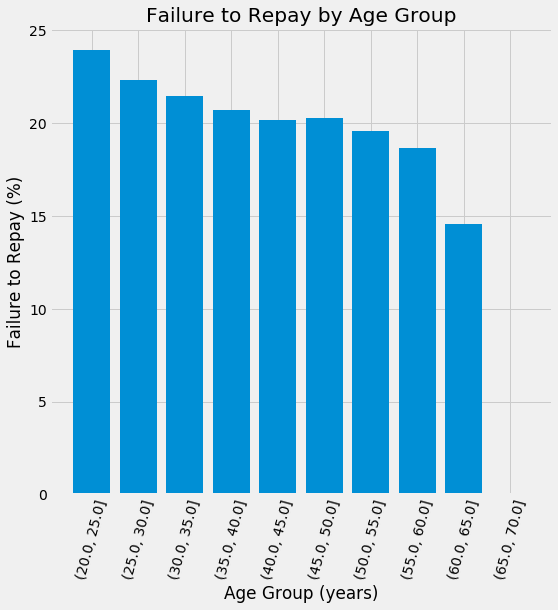

In [46]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['loan_default'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [33]:
#Statistical Info for Age
#alldata['Age'].describe()

count    345546.000000
mean         34.454324
std          10.765448
min          19.000000
25%          26.000000
50%          32.000000
75%          41.000000
max         118.000000
Name: Age, dtype: float64

In [40]:
#Seems to be a zero in age
#alldata[alldata['Age']==118].head()

,AVERAGE.ACCT.AGE,Aadhar_flag,CREDIT.HISTORY.LENGTH,Current_pincode_ID,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,Date.of.Birth,DisbursalDate,Driving_flag,Employee_code_ID,Employment.Type,...,VoterID_flag,asset_cost,branch_id,disbursed_amount,loan_default,ltv,manufacturer_id,source,supplier_id,Age
874,0yrs 0mon,1,0yrs 0mon,5940,0,16-07-00,08-10-18,0,1464,Self employed,...,0,80906,11,56013,0.0,71.69,49,train,24654,118
1300,0yrs 0mon,1,0yrs 0mon,6207,0,05-03-00,27-10-18,0,785,Self employed,...,0,63872,20,46952,1.0,75.15,45,train,14158,118
1864,0yrs 0mon,1,0yrs 0mon,7124,0,01-01-00,28-09-18,0,413,Self employed,...,0,80109,63,65282,0.0,83.64,86,train,17066,118
1872,0yrs 0mon,1,0yrs 0mon,7094,0,18-08-00,16-09-18,0,413,Self employed,...,0,106503,63,73217,0.0,70.33,86,train,17066,118
1874,0yrs 0mon,1,0yrs 0mon,7106,0,01-01-00,26-08-18,0,413,Self employed,...,0,65223,63,56713,1.0,89.23,86,train,17066,118


In [41]:
# 984 count for Age=0
#alldata['Age'].value_counts()

23     15491
24     15408
22     15217
26     15062
25     14844
28     14721
27     13754
30     13548
29     12951
31     12667
32     12267
33     11672
21     11382
34     11073
35     10705
36     10303
38     10072
37      9240
40      8750
43      8463
42      8358
39      8323
41      7950
44      6962
45      6743
46      6704
48      6236
47      5638
49      4713
50      4672
51      3767
53      3669
52      3422
20      3282
54      2635
55      2364
19      2358
56      2148
58      1787
57      1761
59      1172
118      984
60       908
61       610
62       510
63       248
64        31
69         1
Name: Age, dtype: int64

In [42]:
#alldata['Age'].mean()

34.454324460419166

In [48]:
alldata.drop('Date.of.Birth', axis=1, inplace=True)

In [49]:
alldata['CREDIT.HISTORY.LENGTH'] = alldata['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
alldata['CREDIT.HISTORY.LENGTH'] = alldata['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split('yrs')[0])
alldata['CREDIT.HISTORY.LENGTH'].head()

0    0
1    1
2    0
3    1
4    0
Name: CREDIT.HISTORY.LENGTH, dtype: object

In [50]:
alldata['Credit_History'] = alldata['CREDIT.HISTORY.LENGTH'].map(int)
alldata['Credit_History'].head(15)

0     0
1     1
2     0
3     1
4     0
5     2
6     0
7     0
8     4
9     1
10    0
11    2
12    2
13    2
14    7
Name: Credit_History, dtype: int64

In [51]:
alldata['Credit_History'].map(lambda c: 1 if c>= 1 else 0)

0         0
1         1
2         0
3         1
4         0
5         1
6         0
7         0
8         1
9         1
10        0
11        1
12        1
13        1
14        1
15        0
16        1
17        1
18        1
19        0
20        0
21        1
22        0
23        1
24        0
25        0
26        0
27        0
28        1
29        1
         ..
112362    0
112363    0
112364    1
112365    1
112366    0
112367    0
112368    0
112369    0
112370    0
112371    0
112372    0
112373    0
112374    1
112375    0
112376    0
112377    1
112378    0
112379    0
112380    0
112381    1
112382    0
112383    1
112384    0
112385    0
112386    1
112387    0
112388    0
112389    1
112390    0
112391    0
Name: Credit_History, Length: 345546, dtype: int64

In [52]:
alldata.drop('CREDIT.HISTORY.LENGTH', axis=1, inplace=True)

In [53]:
alldata.select_dtypes('object').apply(pd.Series.nunique, axis=0)

AVERAGE.ACCT.AGE                 200
DisbursalDate                    111
Employment.Type                    2
PERFORM_CNS.SCORE.DESCRIPTION     20
source                             2
dtype: int64

In [54]:
alldata['AVERAGE.ACCT.AGE'] = alldata['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
alldata['AVERAGE.ACCT.AGE'] = alldata['AVERAGE.ACCT.AGE'].apply(lambda x: x.split('yrs')[0])

alldata['Avg_acct_yrs'] = alldata['AVERAGE.ACCT.AGE'].map(int)
alldata['Avg_acct_yrs'].head(15)

0     0
1     1
2     0
3     0
4     0
5     1
6     0
7     0
8     4
9     1
10    0
11    2
12    1
13    1
14    3
Name: Avg_acct_yrs, dtype: int64

In [55]:
alldata.drop('AVERAGE.ACCT.AGE', axis=1,inplace=True)

In [56]:
alldata['cltv']=(alldata['PRI.DISBURSED.AMOUNT'] + alldata['SEC.DISBURSED.AMOUNT']) / alldata['asset_cost']
alldata['cltv'].head()

0    0.000000
1    0.765828
2    0.000000
3    0.000000
4    0.000000
Name: cltv, dtype: float64

In [57]:
alldata['ltv']=alldata['ltv']/100
alldata['ltv'].head(10)

0    0.8955
1    0.7323
2    0.8963
3    0.8848
4    0.8839
5    0.8966
6    0.7642
7    0.7189
8    0.8956
9    0.8695
Name: ltv, dtype: float64

In [58]:
alldata.select_dtypes('object').apply(pd.Series.nunique, axis=0)

DisbursalDate                    111
Employment.Type                    2
PERFORM_CNS.SCORE.DESCRIPTION     20
source                             2
dtype: int64

In [59]:
alldata.shape

(345546, 43)

In [60]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['PERFORM_CNS.SCORE.DESCRIPTION','Employment.Type','DisbursalDate']
le=LabelEncoder()
for i in var_mod:
        alldata[i]=le.fit_transform(alldata[i])
        if(i!='loan_default'):
          alldata[i]=le.fit_transform(alldata[i])

In [62]:
alldata['Current_pincode_ID'].nunique()

7096

#### From the Data Dictionary provide, Current_pincode_ID is the current pincode of the customer. I decided to use this information to use in feature engineering. Using the assumption 7096 customers applied for numerous loans. 

In [63]:
alldata['pc_disbursed_sum']= alldata.groupby('Current_pincode_ID')['disbursed_amount'].transform('sum')
alldata['pc_pri_no_accts_sum']= alldata.groupby('Current_pincode_ID')['PRI.NO.OF.ACCTS'].transform('sum')
alldata['pc_pri_no_accts_count']= alldata.groupby('Current_pincode_ID')['PRI.NO.OF.ACCTS'].transform('count')
alldata['pc_pri_overdue_accts_sum']= alldata.groupby('Current_pincode_ID')['PRI.OVERDUE.ACCTS'].transform('sum')
alldata['pc_pri_overdue_accts_count']= alldata.groupby('Current_pincode_ID')['PRI.OVERDUE.ACCTS'].transform('count')
alldata['pc_pri_active_accts_sum']= alldata.groupby('Current_pincode_ID')['PRI.ACTIVE.ACCTS'].transform('sum')
alldata['pc_pri_active_accts_count']= alldata.groupby('Current_pincode_ID')['PRI.ACTIVE.ACCTS'].transform('count')
alldata['pc_new_accts_six_sum']= alldata.groupby('Current_pincode_ID')['NEW.ACCTS.IN.LAST.SIX.MONTHS'].transform('sum')
alldata['pc_new_accts_six_count']= alldata.groupby('Current_pincode_ID')['NEW.ACCTS.IN.LAST.SIX.MONTHS'].transform('count')
alldata['pc_delinq_accts_six_sum']= alldata.groupby('Current_pincode_ID')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].transform('sum')
alldata['pc_delinq_accts_six_count']= alldata.groupby('Current_pincode_ID')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].transform('count')
alldata['pc_pri_current_bal_sum']= alldata.groupby('Current_pincode_ID')['PRI.CURRENT.BALANCE'].transform('sum')
alldata['pc_pri_disbursed_sum']= alldata.groupby('Current_pincode_ID')['PRI.DISBURSED.AMOUNT'].transform('sum')
alldata['pc_pri_sanctioned_sum']= alldata.groupby('Current_pincode_ID')['PRI.SANCTIONED.AMOUNT'].transform('sum')
alldata['pc_pri_instal_sum']= alldata.groupby('Current_pincode_ID')['PRIMARY.INSTAL.AMT'].transform('sum')
alldata['pc_cns_score']= alldata.groupby('Current_pincode_ID')['PERFORM_CNS.SCORE'].transform('max')
alldata['pc_asset_cost_sum']= alldata.groupby('Current_pincode_ID')['asset_cost'].transform('sum')
#sec
alldata['pc_sec_no_accts_sum']= alldata.groupby('Current_pincode_ID')['SEC.NO.OF.ACCTS'].transform('sum')
alldata['pc_sec_no_accts_count']= alldata.groupby('Current_pincode_ID')['SEC.NO.OF.ACCTS'].transform('count')
alldata['pc_sec_overdue_accts_sum']= alldata.groupby('Current_pincode_ID')['SEC.OVERDUE.ACCTS'].transform('sum')
alldata['pc_sec_overdue_accts_count']= alldata.groupby('Current_pincode_ID')['SEC.OVERDUE.ACCTS'].transform('count')
alldata['pc_sec_active_accts_sum']= alldata.groupby('Current_pincode_ID')['SEC.ACTIVE.ACCTS'].transform('sum')
alldata['pc_sec_active_accts_count']= alldata.groupby('Current_pincode_ID')['SEC.ACTIVE.ACCTS'].transform('count')
alldata['pc_sec_current_bal_sum']= alldata.groupby('Current_pincode_ID')['SEC.CURRENT.BALANCE'].transform('sum')
alldata['pc_sec_disbursed_sum']= alldata.groupby('Current_pincode_ID')['SEC.DISBURSED.AMOUNT'].transform('sum')
alldata['pc_sec_sanctioned_sum']= alldata.groupby('Current_pincode_ID')['SEC.SANCTIONED.AMOUNT'].transform('sum')
alldata['pc_sec_instal_sum']= alldata.groupby('Current_pincode_ID')['SEC.INSTAL.AMT'].transform('sum')

In [64]:
alldata['total_pc_pri_no_accts_count'] = alldata['pc_pri_no_accts_count'] +alldata['pc_sec_no_accts_count']
alldata['total_pc_pri_no_accts_sum']=alldata['pc_pri_no_accts_sum'] +alldata['pc_sec_no_accts_sum']
alldata['total_pc_disbursed']=alldata['pc_pri_disbursed_sum']+alldata['pc_sec_disbursed_sum']
alldata['total_pc_pri_instal_sum']=alldata['pc_pri_instal_sum']+alldata['pc_sec_instal_sum']
alldata['total_pc_cltv'] = alldata['total_pc_disbursed'] / alldata['pc_asset_cost_sum']


In [65]:
alldata['ltv_good']=alldata['ltv'].map(lambda c: 1 if c  <= 0.80  else 0)
alldata['ltv_good'].head()

0    0
1    1
2    0
3    0
4    0
Name: ltv_good, dtype: int64

In [66]:
alldata['branch_disbursed_sum']= alldata.groupby('branch_id')['disbursed_amount'].transform('sum')
alldata['branch_pri_no_accts_sum']= alldata.groupby('branch_id')['PRI.NO.OF.ACCTS'].transform('sum')
alldata['branch_pri_no_accts_count']= alldata.groupby('branch_id')['PRI.NO.OF.ACCTS'].transform('count')
alldata['branch_pri_overdue_accts_sum']= alldata.groupby('branch_id')['PRI.OVERDUE.ACCTS'].transform('sum')
alldata['branch_pri_overdue_accts_count']= alldata.groupby('branch_id')['PRI.OVERDUE.ACCTS'].transform('count')
alldata['branch_pri_active_accts_sum']= alldata.groupby('branch_id')['PRI.ACTIVE.ACCTS'].transform('sum')
alldata['branch_pri_active_accts_count']= alldata.groupby('branch_id')['PRI.ACTIVE.ACCTS'].transform('count')
alldata['branch_new_accts_six_sum']= alldata.groupby('branch_id')['NEW.ACCTS.IN.LAST.SIX.MONTHS'].transform('sum')
alldata['branch_new_accts_six_count']= alldata.groupby('branch_id')['NEW.ACCTS.IN.LAST.SIX.MONTHS'].transform('count')
alldata['branch_delinq_accts_six_sum']= alldata.groupby('branch_id')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].transform('sum')
alldata['branch_delinq_accts_six_count']= alldata.groupby('branch_id')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].transform('count')
alldata['branch_pri_current_bal_sum']= alldata.groupby('branch_id')['PRI.CURRENT.BALANCE'].transform('sum')
alldata['branch_pri_disbursed_sum']= alldata.groupby('branch_id')['PRI.DISBURSED.AMOUNT'].transform('sum')
alldata['branch_pri_sanctioned_sum']= alldata.groupby('branch_id')['PRI.SANCTIONED.AMOUNT'].transform('sum')
alldata['branch_pri_instal_sum']= alldata.groupby('branch_id')['PRIMARY.INSTAL.AMT'].transform('sum')
alldata['branch_cns_score']= alldata.groupby('branch_id')['PERFORM_CNS.SCORE'].transform('max')
#sec
alldata['branch_sec_no_accts_sum']= alldata.groupby('branch_id')['SEC.NO.OF.ACCTS'].transform('sum')
alldata['branch_sec_no_accts_count']= alldata.groupby('branch_id')['SEC.NO.OF.ACCTS'].transform('count')
alldata['branch_sec_overdue_accts_sum']= alldata.groupby('branch_id')['SEC.OVERDUE.ACCTS'].transform('sum')
alldata['branch_sec_overdue_accts_count']= alldata.groupby('branch_id')['SEC.OVERDUE.ACCTS'].transform('count')
alldata['branch_sec_active_accts_sum']= alldata.groupby('branch_id')['SEC.ACTIVE.ACCTS'].transform('sum')
alldata['branch_sec_active_accts_count']= alldata.groupby('branch_id')['SEC.ACTIVE.ACCTS'].transform('count')
alldata['branch_sec_current_bal_sum']= alldata.groupby('branch_id')['SEC.CURRENT.BALANCE'].transform('sum')
alldata['branch_sec_disbursed_sum']= alldata.groupby('branch_id')['SEC.DISBURSED.AMOUNT'].transform('sum')
alldata['branch_sec_sanctioned_sum']= alldata.groupby('branch_id')['SEC.SANCTIONED.AMOUNT'].transform('sum')
alldata['branch_sec_instal_sum']= alldata.groupby('branch_id')['SEC.INSTAL.AMT'].transform('sum')

In [67]:
alldata['supp_disbursed_sum']= alldata.groupby('supplier_id')['disbursed_amount'].transform('sum')
alldata['supp_pri_no_accts_sum']= alldata.groupby('supplier_id')['PRI.NO.OF.ACCTS'].transform('sum')
alldata['supp_pri_no_accts_count']= alldata.groupby('supplier_id')['PRI.NO.OF.ACCTS'].transform('count')
alldata['supp_pri_overdue_accts_sum']= alldata.groupby('supplier_id')['PRI.OVERDUE.ACCTS'].transform('sum')
alldata['supp_pri_overdue_accts_count']= alldata.groupby('supplier_id')['PRI.OVERDUE.ACCTS'].transform('count')
alldata['supp_pri_active_accts_sum']= alldata.groupby('supplier_id')['PRI.ACTIVE.ACCTS'].transform('sum')
alldata['supp_pri_active_accts_count']= alldata.groupby('supplier_id')['PRI.ACTIVE.ACCTS'].transform('count')
alldata['supp_new_accts_six_sum']= alldata.groupby('supplier_id')['NEW.ACCTS.IN.LAST.SIX.MONTHS'].transform('sum')
alldata['supp_new_accts_six_count']= alldata.groupby('supplier_id')['NEW.ACCTS.IN.LAST.SIX.MONTHS'].transform('count')
alldata['supp_delinq_accts_six_sum']= alldata.groupby('supplier_id')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].transform('sum')
alldata['supp_delinq_accts_six_count']= alldata.groupby('supplier_id')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].transform('count')
alldata['supp_pri_current_bal_sum']= alldata.groupby('supplier_id')['PRI.CURRENT.BALANCE'].transform('sum')
alldata['supp_pri_disbursed_sum']= alldata.groupby('supplier_id')['PRI.DISBURSED.AMOUNT'].transform('sum')
alldata['supp_pri_sanctioned_sum']= alldata.groupby('supplier_id')['PRI.SANCTIONED.AMOUNT'].transform('sum')
alldata['supp_pri_instal_sum']= alldata.groupby('supplier_id')['PRIMARY.INSTAL.AMT'].transform('sum')
alldata['supp_cns_score']= alldata.groupby('supplier_id')['PERFORM_CNS.SCORE'].transform('max')
#sec
alldata['supp_sec_no_accts_sum']= alldata.groupby('supplier_id')['SEC.NO.OF.ACCTS'].transform('sum')
alldata['supp_sec_no_accts_count']= alldata.groupby('supplier_id')['SEC.NO.OF.ACCTS'].transform('count')
alldata['supp_sec_overdue_accts_sum']= alldata.groupby('supplier_id')['SEC.OVERDUE.ACCTS'].transform('sum')
alldata['supp_sec_overdue_accts_count']= alldata.groupby('supplier_id')['SEC.OVERDUE.ACCTS'].transform('count')
alldata['supp_sec_active_accts_sum']= alldata.groupby('supplier_id')['SEC.ACTIVE.ACCTS'].transform('sum')
alldata['supp_sec_active_accts_count']= alldata.groupby('supplier_id')['SEC.ACTIVE.ACCTS'].transform('count')
alldata['supp_sec_current_bal_sum']= alldata.groupby('supplier_id')['SEC.CURRENT.BALANCE'].transform('sum')
alldata['supp_sec_disbursed_sum']= alldata.groupby('supplier_id')['SEC.DISBURSED.AMOUNT'].transform('sum')
alldata['supp_sec_sanctioned_sum']= alldata.groupby('supplier_id')['SEC.SANCTIONED.AMOUNT'].transform('sum')
alldata['supp_sec_instal_sum']= alldata.groupby('supplier_id')['SEC.INSTAL.AMT'].transform('sum')

In [68]:
alldata['emp_disbursed_sum']= alldata.groupby('Employee_code_ID')['disbursed_amount'].transform('sum')
alldata['emp_pri_no_accts_sum']= alldata.groupby('Employee_code_ID')['PRI.NO.OF.ACCTS'].transform('sum')
alldata['emp_pri_no_accts_count']= alldata.groupby('Employee_code_ID')['PRI.NO.OF.ACCTS'].transform('count')
alldata['emp_pri_overdue_accts_sum']= alldata.groupby('Employee_code_ID')['PRI.OVERDUE.ACCTS'].transform('sum')
alldata['emp_pri_overdue_accts_count']= alldata.groupby('Employee_code_ID')['PRI.OVERDUE.ACCTS'].transform('count')
alldata['emp_pri_active_accts_sum']= alldata.groupby('Employee_code_ID')['PRI.ACTIVE.ACCTS'].transform('sum')
alldata['emp_pri_active_accts_count']= alldata.groupby('Employee_code_ID')['PRI.ACTIVE.ACCTS'].transform('count')
alldata['emp_new_accts_six_sum']= alldata.groupby('Employee_code_ID')['NEW.ACCTS.IN.LAST.SIX.MONTHS'].transform('sum')
alldata['emp_new_accts_six_count']= alldata.groupby('Employee_code_ID')['NEW.ACCTS.IN.LAST.SIX.MONTHS'].transform('count')
alldata['emp_delinq_accts_six_sum']= alldata.groupby('Employee_code_ID')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].transform('sum')
alldata['emp_delinq_accts_six_count']= alldata.groupby('Employee_code_ID')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].transform('count')
alldata['emp_pri_current_bal_sum']= alldata.groupby('Employee_code_ID')['PRI.CURRENT.BALANCE'].transform('sum')
alldata['emp_pri_disbursed_sum']= alldata.groupby('Employee_code_ID')['PRI.DISBURSED.AMOUNT'].transform('sum')
alldata['emp_pri_sanctioned_sum']= alldata.groupby('Employee_code_ID')['PRI.SANCTIONED.AMOUNT'].transform('sum')
alldata['emp_pri_instal_sum']= alldata.groupby('Employee_code_ID')['PRIMARY.INSTAL.AMT'].transform('sum')
alldata['emp_cns_score']= alldata.groupby('Employee_code_ID')['PERFORM_CNS.SCORE'].transform('max')
#sec
alldata['emp_sec_no_accts_sum']= alldata.groupby('Employee_code_ID')['SEC.NO.OF.ACCTS'].transform('sum')
alldata['emp_sec_no_accts_count']= alldata.groupby('Employee_code_ID')['SEC.NO.OF.ACCTS'].transform('count')
alldata['emp_sec_overdue_accts_sum']= alldata.groupby('Employee_code_ID')['SEC.OVERDUE.ACCTS'].transform('sum')
alldata['emp_sec_overdue_accts_count']= alldata.groupby('Employee_code_ID')['SEC.OVERDUE.ACCTS'].transform('count')
alldata['emp_sec_active_accts_sum']= alldata.groupby('Employee_code_ID')['SEC.ACTIVE.ACCTS'].transform('sum')
alldata['emp_sec_active_accts_count']= alldata.groupby('Employee_code_ID')['SEC.ACTIVE.ACCTS'].transform('count')
alldata['emp_sec_current_bal_sum']= alldata.groupby('Employee_code_ID')['SEC.CURRENT.BALANCE'].transform('sum')
alldata['emp_sec_disbursed_sum']= alldata.groupby('Employee_code_ID')['SEC.DISBURSED.AMOUNT'].transform('sum')
alldata['emp_sec_sanctioned_sum']= alldata.groupby('Employee_code_ID')['SEC.SANCTIONED.AMOUNT'].transform('sum')
alldata['emp_sec_instal_sum']= alldata.groupby('Employee_code_ID')['SEC.INSTAL.AMT'].transform('sum')

In [69]:
alldata['state_disbursed_sum']= alldata.groupby('State_ID')['disbursed_amount'].transform('sum')
alldata['state_pri_no_accts_sum']= alldata.groupby('State_ID')['PRI.NO.OF.ACCTS'].transform('sum')
alldata['state_pri_no_accts_count']= alldata.groupby('State_ID')['PRI.NO.OF.ACCTS'].transform('count')
alldata['state_pri_overdue_accts_sum']= alldata.groupby('State_ID')['PRI.OVERDUE.ACCTS'].transform('sum')
alldata['state_pri_overdue_accts_count']= alldata.groupby('State_ID')['PRI.OVERDUE.ACCTS'].transform('count')
alldata['state_pri_active_accts_sum']= alldata.groupby('State_ID')['PRI.ACTIVE.ACCTS'].transform('sum')
alldata['state_pri_active_accts_count']= alldata.groupby('State_ID')['PRI.ACTIVE.ACCTS'].transform('count')
alldata['state_new_accts_six_sum']= alldata.groupby('State_ID')['NEW.ACCTS.IN.LAST.SIX.MONTHS'].transform('sum')
alldata['state_new_accts_six_count']= alldata.groupby('State_ID')['NEW.ACCTS.IN.LAST.SIX.MONTHS'].transform('count')
alldata['state_delinq_accts_six_sum']= alldata.groupby('State_ID')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].transform('sum')
alldata['state_delinq_accts_six_count']= alldata.groupby('State_ID')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].transform('count')
alldata['state_pri_current_bal_sum']= alldata.groupby('State_ID')['PRI.CURRENT.BALANCE'].transform('sum')
alldata['state_pri_disbursed_sum']= alldata.groupby('State_ID')['PRI.DISBURSED.AMOUNT'].transform('sum')
alldata['state_pri_sanctioned_sum']= alldata.groupby('State_ID')['PRI.SANCTIONED.AMOUNT'].transform('sum')
alldata['state_pri_instal_sum']= alldata.groupby('State_ID')['PRIMARY.INSTAL.AMT'].transform('sum')
alldata['state_cns_score']= alldata.groupby('State_ID')['PERFORM_CNS.SCORE'].transform('max')
#sec
alldata['state_sec_no_accts_sum']= alldata.groupby('State_ID')['SEC.NO.OF.ACCTS'].transform('sum')
alldata['state_sec_no_accts_count']= alldata.groupby('State_ID')['SEC.NO.OF.ACCTS'].transform('count')
alldata['state_sec_overdue_accts_sum']= alldata.groupby('State_ID')['SEC.OVERDUE.ACCTS'].transform('sum')
alldata['state_sec_overdue_accts_count']= alldata.groupby('State_ID')['SEC.OVERDUE.ACCTS'].transform('count')
alldata['state_sec_active_accts_sum']= alldata.groupby('State_ID')['SEC.ACTIVE.ACCTS'].transform('sum')
alldata['state_sec_active_accts_count']= alldata.groupby('State_ID')['SEC.ACTIVE.ACCTS'].transform('count')
alldata['state_sec_current_bal_sum']= alldata.groupby('State_ID')['SEC.CURRENT.BALANCE'].transform('sum')
alldata['state_sec_disbursed_sum']= alldata.groupby('State_ID')['SEC.DISBURSED.AMOUNT'].transform('sum')
alldata['state_sec_sanctioned_sum']= alldata.groupby('State_ID')['SEC.SANCTIONED.AMOUNT'].transform('sum')
alldata['state_sec_instal_sum']= alldata.groupby('State_ID')['SEC.INSTAL.AMT'].transform('sum')

In [70]:
alldata['pc_total_current_balance']=alldata['pc_pri_current_bal_sum']+alldata['pc_sec_current_bal_sum']
alldata['state_total_current_balance']=alldata['state_pri_current_bal_sum']+alldata['state_sec_current_bal_sum']
alldata['branch_total_current_balance']=alldata['branch_pri_current_bal_sum']+alldata['branch_sec_current_bal_sum']
alldata['supp_total_current_balance']=alldata['supp_pri_current_bal_sum']+alldata['supp_sec_current_bal_sum']
alldata['emp_total_current_balance']=alldata['emp_pri_current_bal_sum']+alldata['emp_sec_current_bal_sum']

In [71]:
alldata['pc_total_disbursed']=alldata['branch_pri_disbursed_sum']+alldata['branch_sec_disbursed_sum']
alldata['branch_total_disbursed']=alldata['branch_pri_disbursed_sum']+alldata['branch_sec_disbursed_sum']
alldata['supp_total_disbursed']=alldata['branch_pri_disbursed_sum']+alldata['branch_sec_disbursed_sum']
alldata['state_total_disbursed']=alldata['branch_pri_disbursed_sum']+alldata['branch_sec_disbursed_sum']
alldata['emp_total_disbursed']=alldata['branch_pri_disbursed_sum']+alldata['branch_sec_disbursed_sum']



In [72]:
alldata['pc_total_paid']=alldata['pc_total_disbursed']- alldata['pc_total_current_balance']
alldata['state_total_paid']=alldata['state_total_current_balance']+alldata['state_total_disbursed']
alldata['branch_total_paid']=alldata['branch_total_disbursed'] - alldata['branch_total_current_balance']
alldata['supp_total_paid']=alldata['supp_total_current_balance']+alldata['supp_total_disbursed']
alldata['emp_total_paid']=alldata['emp_total_current_balance']+alldata['emp_total_disbursed']

In [73]:
alldata['total_branch_pri_no_accts_sum']=alldata['branch_pri_no_accts_sum'] +alldata['branch_sec_no_accts_sum']
alldata['total_supp_pri_no_accts_sum']=alldata['supp_pri_no_accts_sum'] +alldata['supp_sec_no_accts_sum']
alldata['total_state_pri_no_accts_sum']=alldata['state_pri_no_accts_sum'] +alldata['state_sec_no_accts_sum']
alldata['total_emp_pri_no_accts_sum']=alldata['branch_pri_no_accts_sum'] +alldata['branch_sec_no_accts_sum']

In [74]:
alldata['pc_total_no_inq']=alldata.groupby('Current_pincode_ID')['NO.OF_INQUIRIES'].transform('sum')
alldata['branch_total_no_inq']=alldata.groupby('branch_id')['NO.OF_INQUIRIES'].transform('sum')
alldata['supp_total_no_inq']=alldata.groupby('supplier_id')['NO.OF_INQUIRIES'].transform('sum')
alldata['state_total_no_inq']=alldata.groupby('State_ID')['NO.OF_INQUIRIES'].transform('sum')
alldata['emp_total_no_inq']=alldata.groupby('Employee_code_ID')['NO.OF_INQUIRIES'].transform('sum')



In [75]:
alldata['pc_total_overdue_accts']=alldata['pc_pri_overdue_accts_sum']+alldata['pc_sec_overdue_accts_sum']
alldata['branch_total_overdue_accts']=alldata['branch_pri_overdue_accts_sum']+alldata['branch_sec_overdue_accts_sum']
alldata['supp_total_overdue_accts']=alldata['supp_pri_overdue_accts_sum']+alldata['supp_sec_overdue_accts_sum']
alldata['state_total_overdue_accts']=alldata['state_pri_overdue_accts_sum']+alldata['state_sec_overdue_accts_sum']
alldata['emp_total_overdue_accts']=alldata['emp_pri_overdue_accts_sum']+alldata['emp_sec_overdue_accts_sum']

In [76]:
alldata['pc_no_overdue_by_total_accts']= alldata['pc_total_overdue_accts'] / alldata['total_pc_pri_no_accts_sum']
alldata['branch_no_overdue_by_total_accts']= alldata['branch_total_overdue_accts'] / alldata['total_branch_pri_no_accts_sum']
alldata['supp_no_overdue_by_total_accts']= alldata['supp_total_overdue_accts'] / alldata['total_supp_pri_no_accts_sum']
alldata['state_no_overdue_by_total_accts']= alldata['state_total_overdue_accts'] / alldata['total_state_pri_no_accts_sum']
alldata['emp_no_overdue_by_total_accts']= alldata['emp_total_overdue_accts'] / alldata['total_emp_pri_no_accts_sum']



In [77]:
alldata.shape

(345546, 214)

###### We added quite a few variables using this method.  My first approach I added the PRI and SEC totals and numerous other combonations. LGBM would not break that 0.65ish mark.  After checking feature_importances these variables alone would always be at the top of the list. So I thought creating more variables from them would maybe help the model. I finally was able to break the 0.66 mark on the public LB during the last day. 

In [78]:
alldata['disbursed_amount'] = np.log(alldata['disbursed_amount'])

In [79]:
alldata.drop('UniqueID', axis = 1,inplace=True)                      

In [80]:
train = alldata.loc[alldata['source']=='train']
test = alldata.loc[alldata['source']=='test']

In [81]:
train.shape, test.shape

((233154, 213), (112392, 213))

In [82]:
train.drop('source',axis=1, inplace=True)
test.drop('source',axis=1, inplace=True)

In [0]:
#train.to_csv('train_ltfs_mod.csv', index=False)
#test.to_csv('test_ltfs_mod.csv', index=False)

In [83]:
test = test.drop('loan_default', axis=1)

In [84]:
X = train.drop('loan_default', 1)
y = train.loan_default

In [85]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

In [86]:
#params were fintuned using BayesianOpt

params={'num_leaves': 50,
        'learning_rate':0.1,
        'max_depth': 3,
        'objective':'binary',
        'metric':'auc',
        'num_threads':-1,
        'tree_learner': 'serial',
        'verbosity':1,
        'min_data_in_leaf': 1000,
        'min_sum_hessian_in_leaf':455
      
        
       
         }

In [87]:
i=1
kf = StratifiedKFold(n_splits = 5, random_state =420, shuffle=True)



for train_index, test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  
  x_tr, x_val = X.iloc[train_index], X.iloc[test_index]
  y_tr, y_val = y[train_index], y[test_index]
  
  tr_data = lgb.Dataset(x_tr, label=y_tr)
  val_data = lgb.Dataset(x_val, label=y_val)
  val_data = lgb.Dataset(X.iloc[test_index], label=y[test_index])
  
  
  lgb_model1 = lgb.train(params,tr_data,25000,
                         valid_sets=[tr_data, val_data],
                         verbose_eval = 200, 
                         early_stopping_rounds=500
                        )
  
  oof_lgb_pred_test = lgb_model1.predict(x_val) 
  i += 1
  lgb_pred_test = lgb_model1.predict(test)
  


1 of kfold 5
Training until validation scores don't improve for 500 rounds.
[200]	training's auc: 0.680739	valid_1's auc: 0.667027
[400]	training's auc: 0.6914	valid_1's auc: 0.670751
[600]	training's auc: 0.698434	valid_1's auc: 0.672394
[800]	training's auc: 0.70435	valid_1's auc: 0.673742
[1000]	training's auc: 0.709506	valid_1's auc: 0.674272
[1200]	training's auc: 0.713851	valid_1's auc: 0.674378
[1400]	training's auc: 0.717725	valid_1's auc: 0.6745
[1600]	training's auc: 0.721084	valid_1's auc: 0.674081
[1800]	training's auc: 0.724273	valid_1's auc: 0.674072
Early stopping, best iteration is:
[1333]	training's auc: 0.716339	valid_1's auc: 0.674563

2 of kfold 5
Training until validation scores don't improve for 500 rounds.
[200]	training's auc: 0.680299	valid_1's auc: 0.668354
[400]	training's auc: 0.691167	valid_1's auc: 0.672768
[600]	training's auc: 0.698716	valid_1's auc: 0.674402
[800]	training's auc: 0.704489	valid_1's auc: 0.675174
[1000]	training's auc: 0.70969	valid_1's

#### This model scored our best. 
#### Public LB: 0.6604528139 which put us in 112th/1342.  
#### Private LB: 0.6631884673 for 118th/1342 

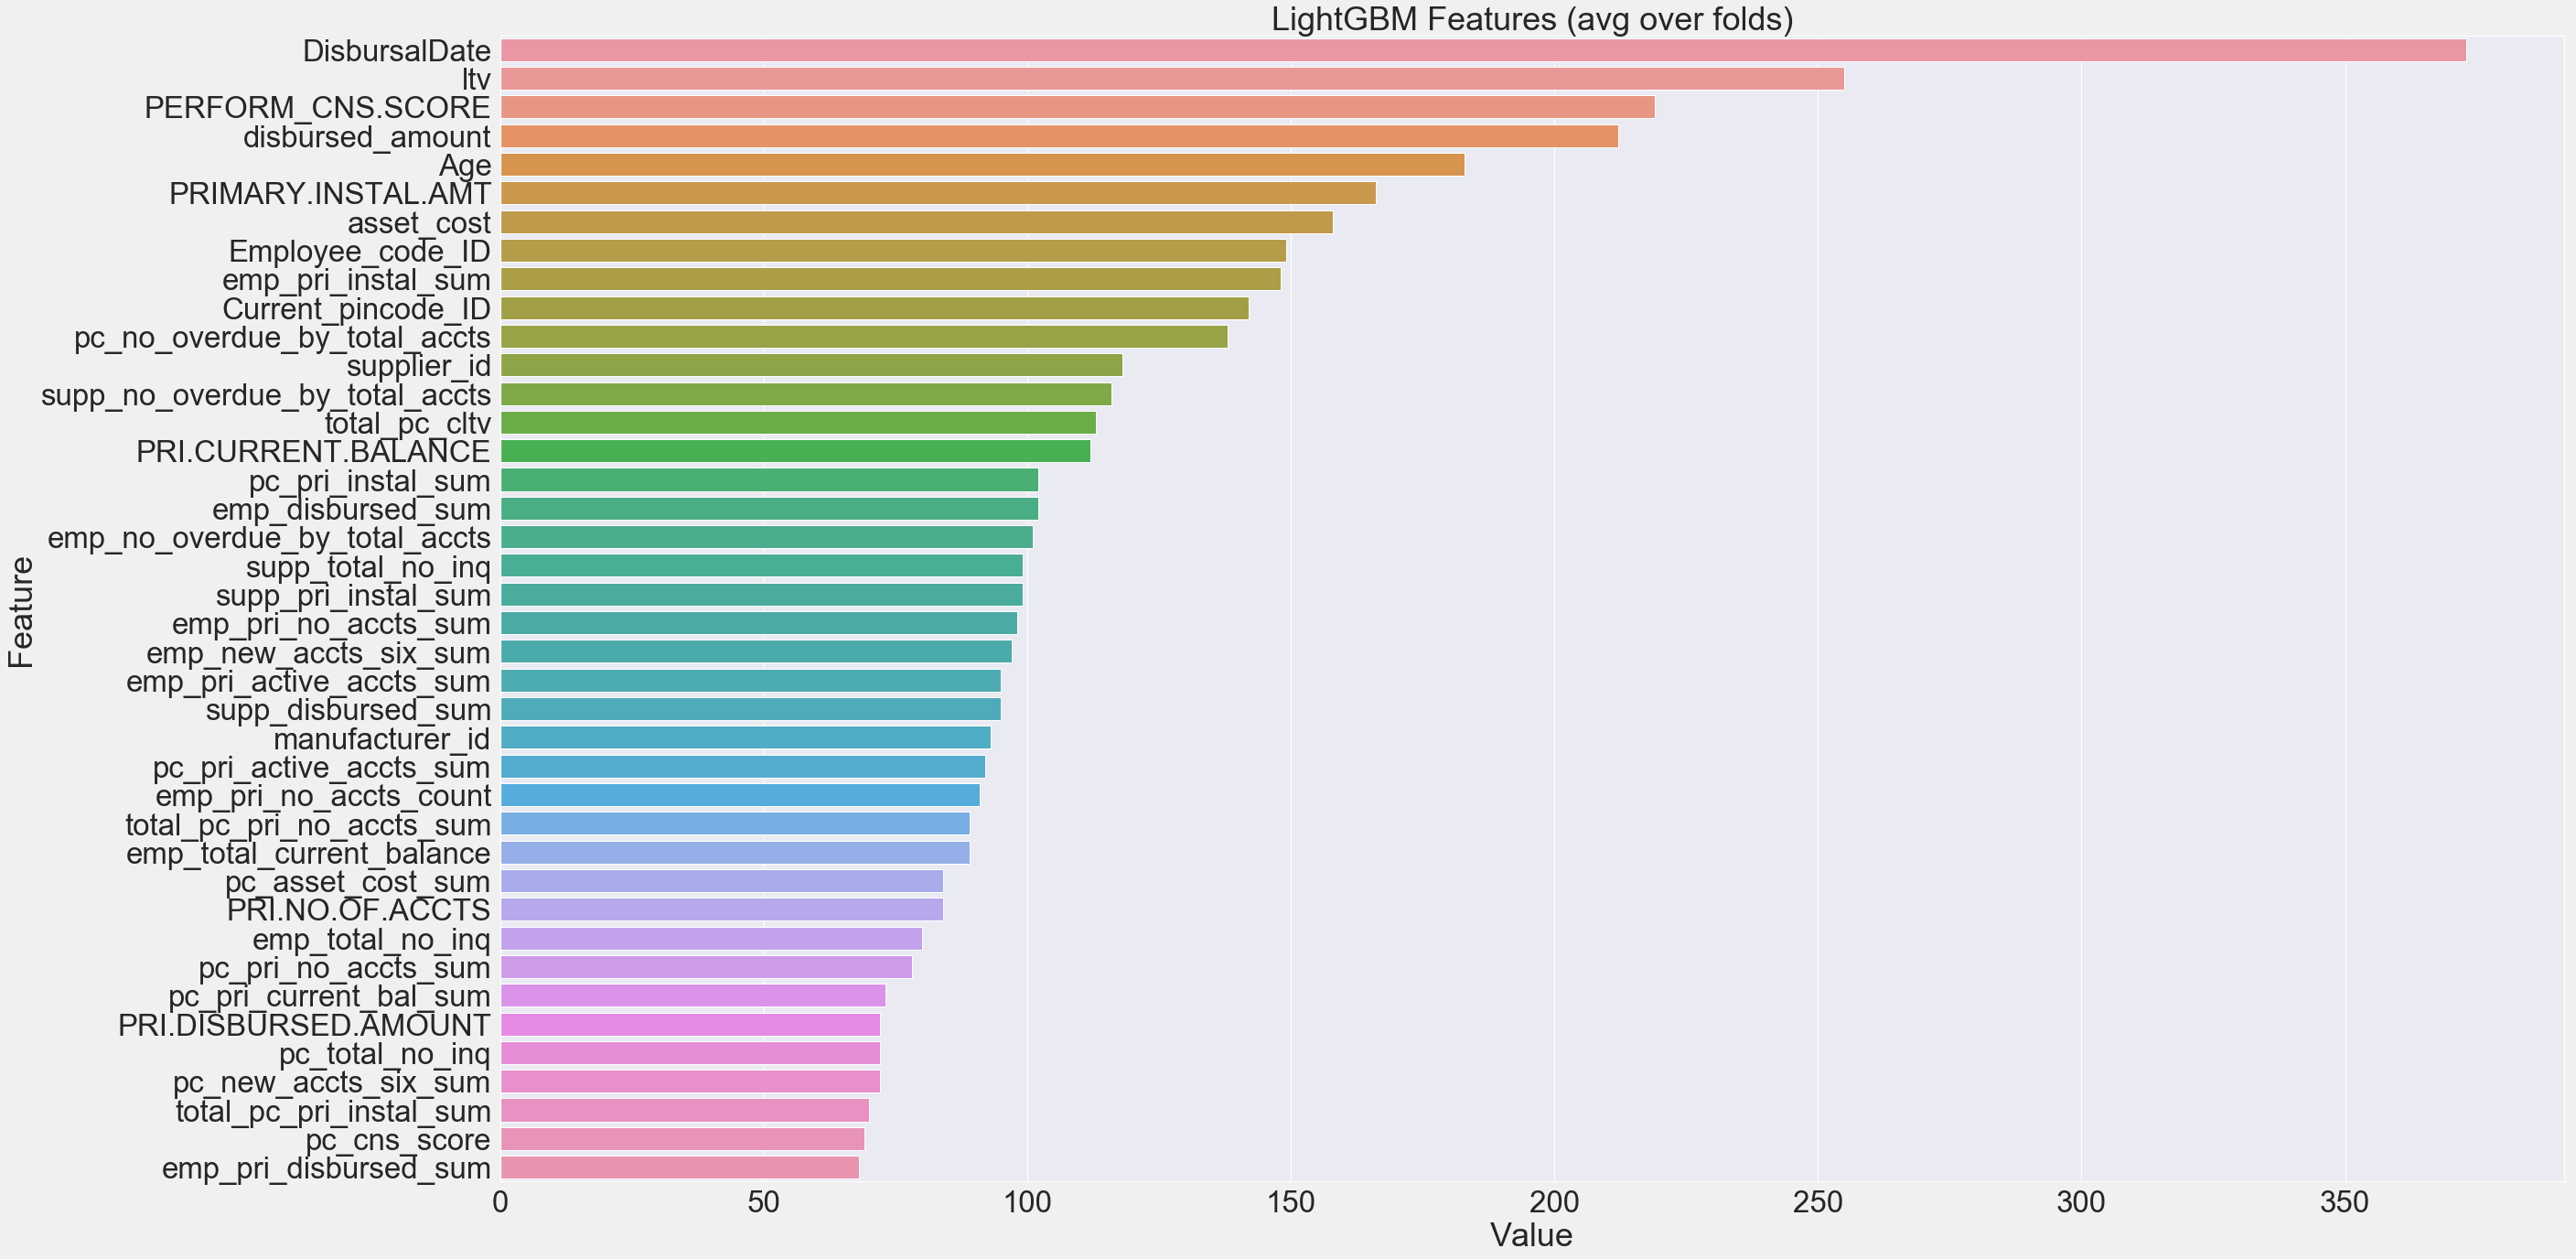

In [88]:
#Showing first 41 important features per LGBM

feature_imp = pd.DataFrame(sorted(zip(lgb_model1.feature_importance(),X.columns)), 
                               columns=['Value','Feature'])
plt.figure(figsize=(40, 20))
sns.set(font_scale = 3)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:40])
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [0]:
#submission = pd.read_csv('sample_submission_24jSKY6.csv')
#submission['loan_default']= lgb_pred_test
#submission['UniqueID'] = test_og['UniqueID']

#pd.DataFrame(submission, columns=['UniqueID', 'loan_default']).to_csv('best_finetune_1.csv', index=False)